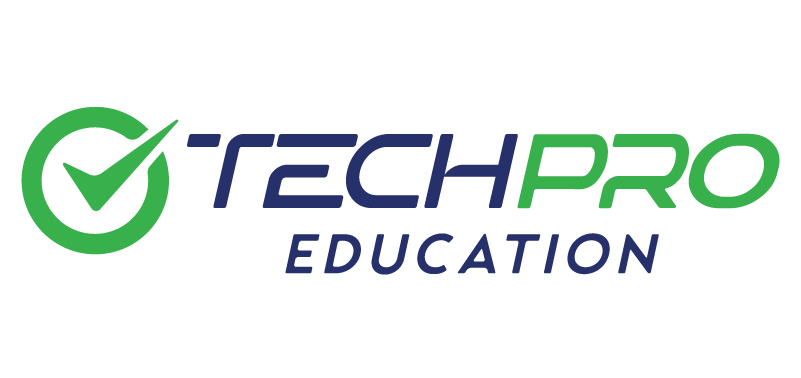

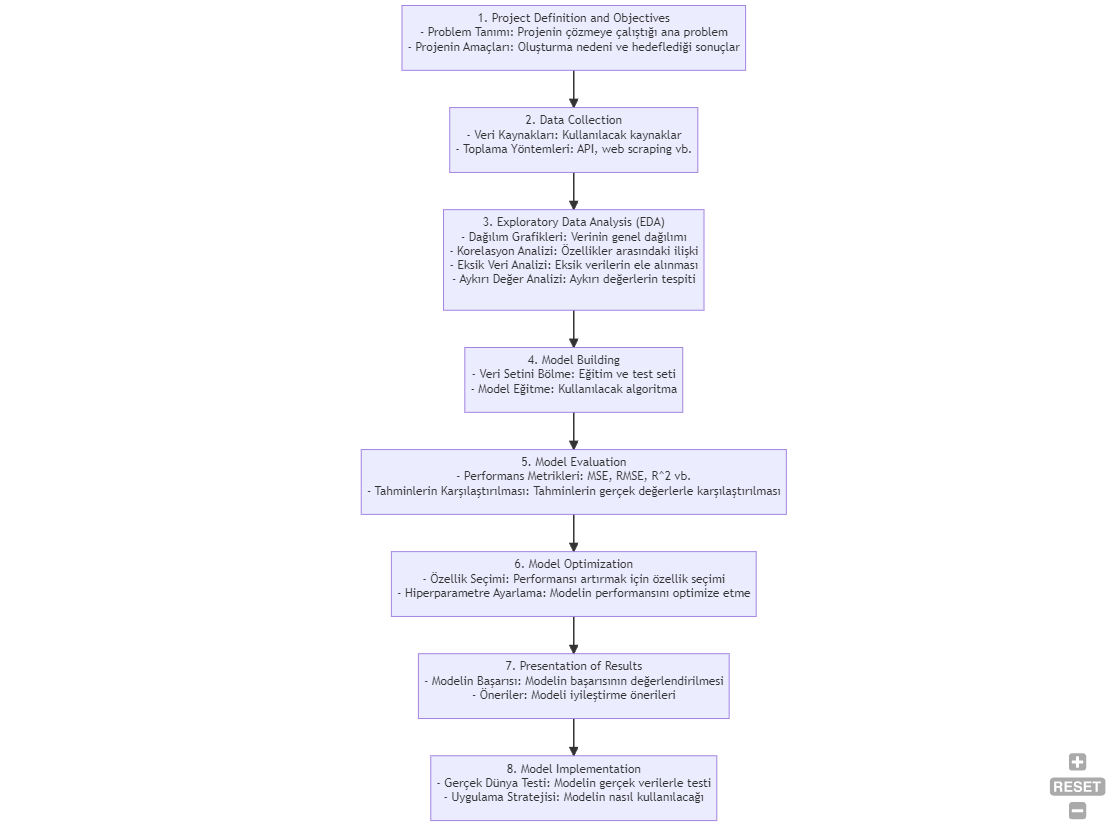

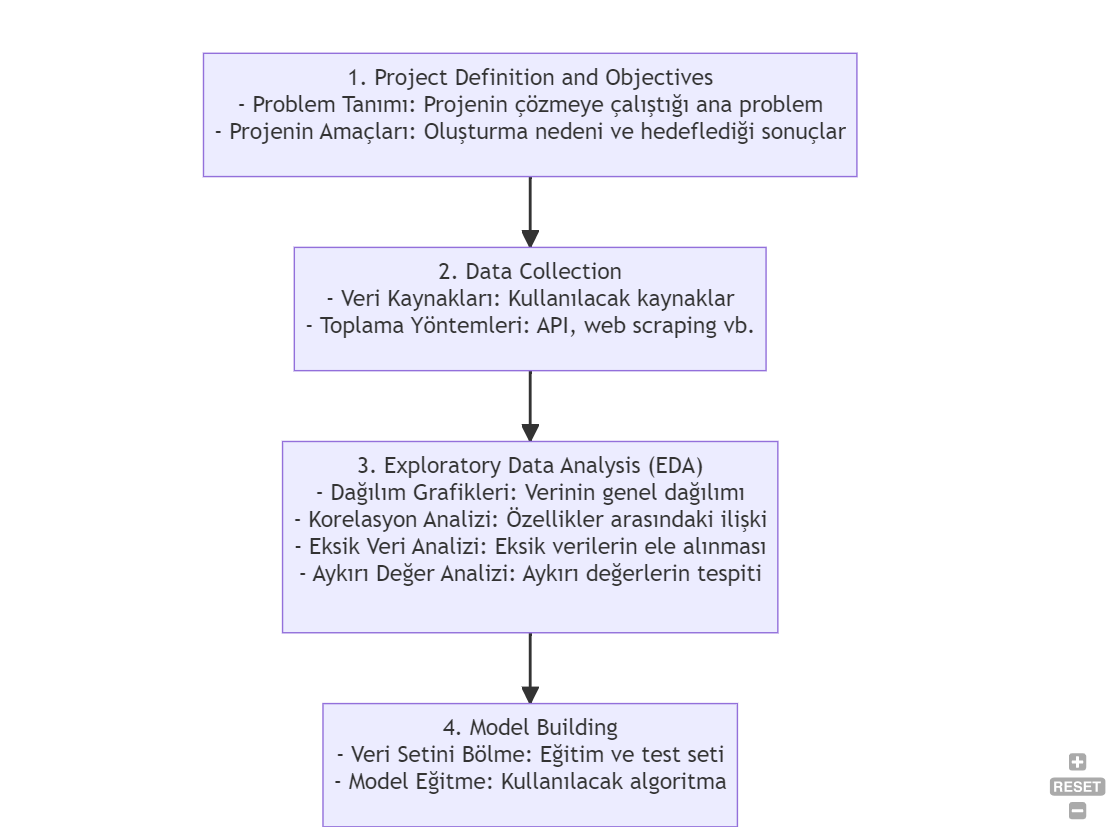

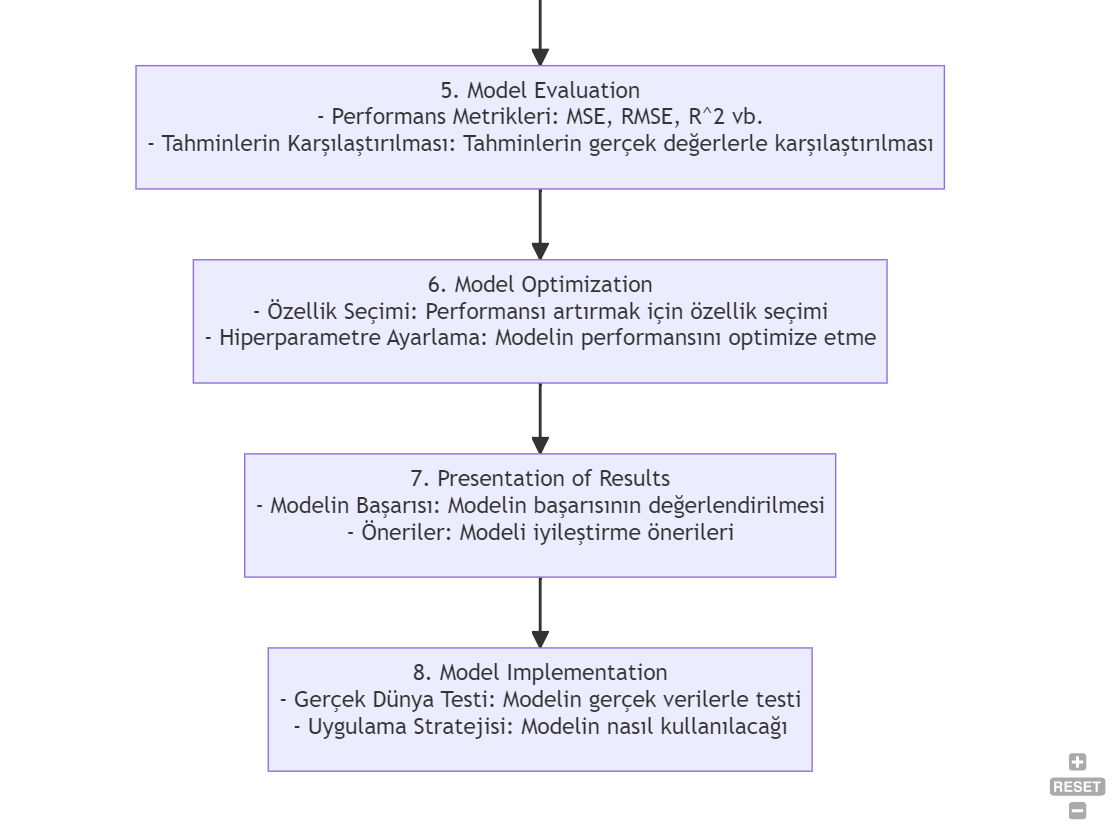

# Determines

- **Auto Scout** datası, 2019'da çevrimiçi otomobil ticaret şirketi [AutoScout24](https://www.autoscout24.com) 'den alınmıştır ve 9 farklı otomobil modelinin birçok özelliğini içermektedir. 

- Bu projede, algoritmalar için zaten önceden işlenmiş ve hazırlanmış veri setini kullanacağız.

- Bu projenin amacı, makine öğrenimi algoritmalarını anlamaktır. Bu nedenle, düzenlenmiş veri üzerinde çalışacağınız için yoğun bir EDA sürecine ihtiyaç duymayacağız.

- Bu senaryoda, regresyon algoritmalarını kullanarak otomobil fiyatlarını tahmin edeceğiz.

- Başlarken gerekli kütüphaneleri içe aktarmamız gerekecek. Ayrıca modellemeye geçmeden önce birkaç ön işleme yapmamız gerekecek.

- Daha sonra sırasıyla Lineer Regresyon, Ridge Regresyon, Lasso Regresyon ve Elastic-Net algoritmalarını uygulayacağız. 

- Modellerimizin başarısını regresyon hata metrikleriyle ve cross validation yöntemiyle ölçebiliriz.

- Daha iyi sonuçlar için, hiperparametre ayarlama yaparak modellerinizin başarısını artırmaya çalışağız. 

- Model için feature ların önemlerini belirleyip kaynak tasarrufu için modelimizi en önemli feature lar ile ayarlayacağız. 

- Son olarak, algoritmaların performanslarını karşılaştıracağız.

- Ayrıca en başarılı tahmin oranına sahip olan algoritma üzerinde daha fazla çalışabilirsiniz.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance

- 11. Prediction

# Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10

# EDA

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

**datayı tanıyoruz**

- std, meanden büyük veya meane yakın bir değerse datamızın genelinde bir outler problemi olduğuna dair bize çıkarım sağlar.

- "min" ile %25'lik ilk çeyrek arasında ve/veya %75'lik 3.çeyrek ile max arasında uçurum varsa datamızın genelinde olmasa da sınırlı sayıda outlier değerler olabileceğine dair çıkarım sağlar.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [6]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [7]:
df2 = df.copy()

## Feature Engineering

In [8]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control ?

In [9]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())
    
# <20 ile en soldan ":" işaretine kadar 20 karakterlik boşluk bırakılır ve feature isimleri bu boşluğa yazdırılır.
# ":" işareti tüm satırlarda aynı hizaya getirilmiş olur.

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [10]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

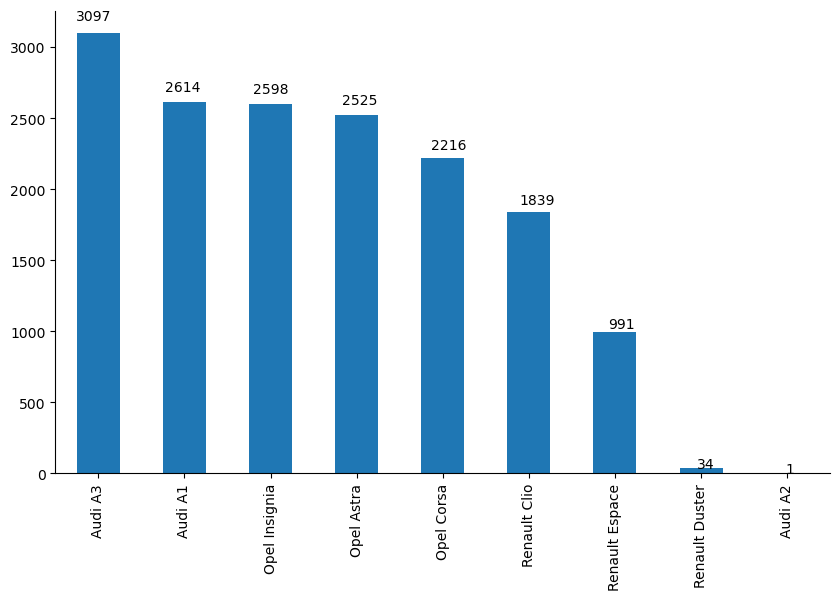

In [11]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))
    
# ax.bar_label(ax.containers[0]);

In [12]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [13]:
df.drop(index=[2614], inplace =True)

In [14]:
df.shape

(15914, 23)

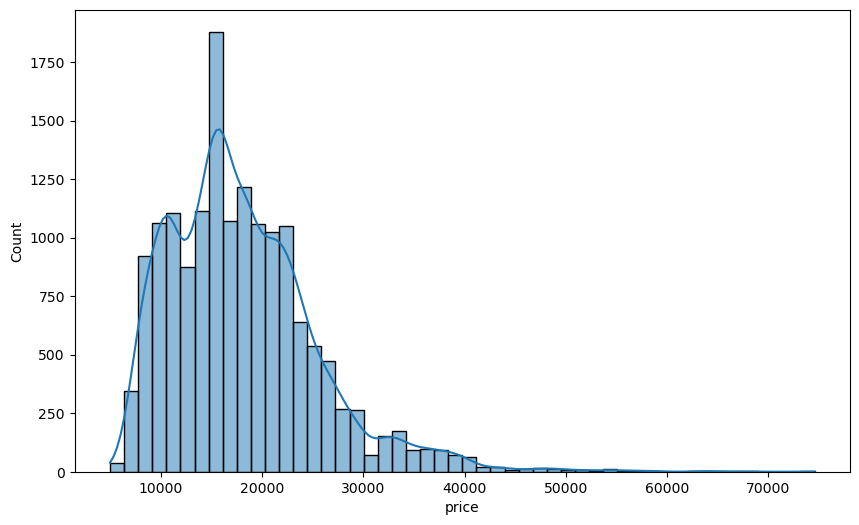

In [15]:
sns.histplot(df.price, bins=50, kde=True);

In [16]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


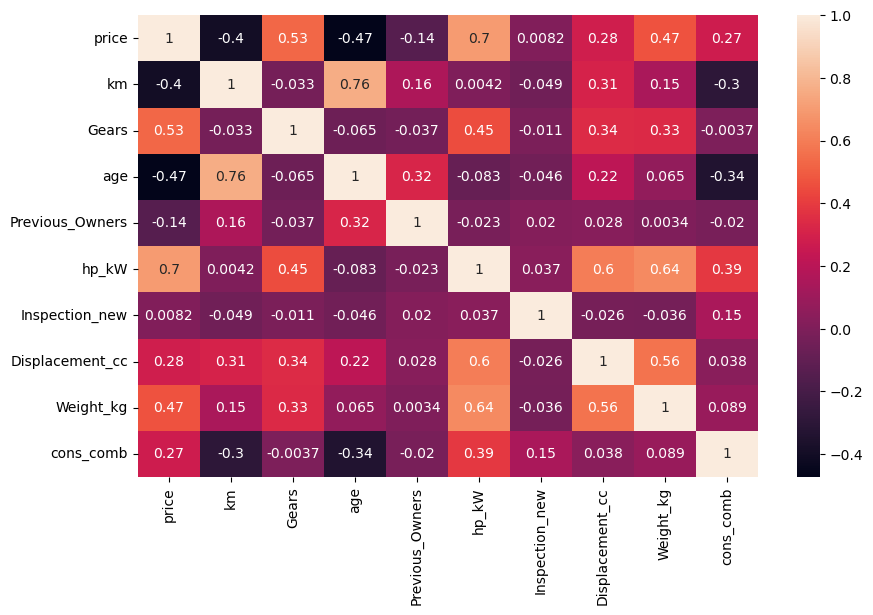

In [17]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

- Multicollinearity sorunu linear ve logisitc reg. gibi gradient descent tabanlı modellerde bir problem olarak karşımıza çıkar. 

- Multicollinearity bağımsız değişkenler arasında yüksek bir korelasyon olduğunda ortaya çıkar. Bu durum, bir bağımsız değişkenin diğer bağımsız değişkenlerle güçlü bir şekilde ilişkili olduğunda, diğer bağımsız değişkenlerin modeldeki önemini azaltabilir.

- Multicollinearity sorunu, modelin doğru bir şekilde yorumlanmasını zorlaştırabilir. Model katsayılarının doğru bir şekilde tahmin edilmesi zordur ve bazı değişkenlerin etkisinin yanlış yorumlanmasına neden olabilir. Bu nedenle, doğru sonuçlar elde etmek için, multikolinerite sorunu ortadan kaldırılmalıdır.

- Regulirazition algoritmaları overfiting problemini giderdiği gibi Multicollinearity sorununu da giderir.

In [18]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# +0.9 ile +1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.

False

In [19]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# -0.9 ile -1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.

False

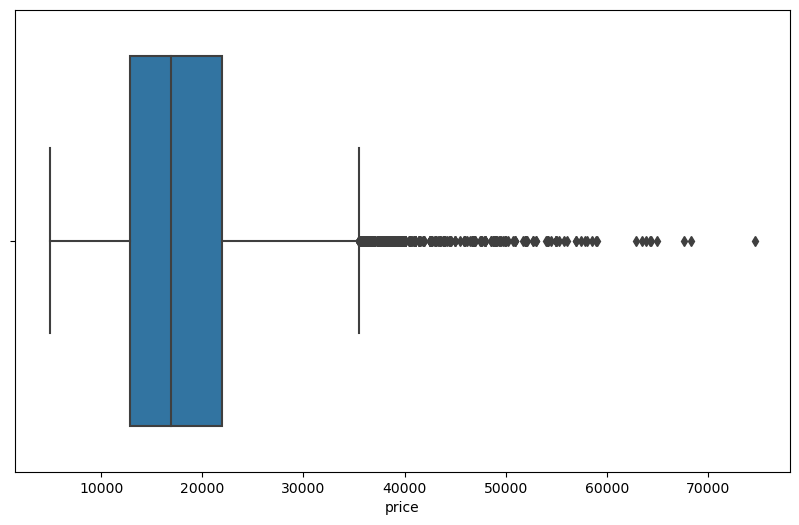

In [20]:
sns.boxplot(df.price);

# Boxplot üzerinden de outlierlar hakkında insightlar elde edebiliriz. Ancak bu insightlar bizi yanıltabilir.
# Bu yüzden değerlendirmemizi datanın geneli için değil, datadaki gruplara (Audi A1, Audi A3, Reanult clio vb) göre yapacağız.

In [162]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

# Aşağıdaki görsellere baktığımızda boxplota göre Audi A3, Opel Astra, Opel insignia, Renault clio için 3 wisker 
# baz alınarak outlier olabilecek gözlemleri görebiliyoruz. Kendi datalarınızda 
# bu görsellere göre her grup için ayrı wisker değerleri belirleyebilirsiniz.

# IQR hesaplamak için şu adımlar izlenir:

# Veriler küçükten büyüğe sıralanır.
# Verilerin %25'ini ve %75'ini temsil eden ilk ve üçüncü çeyrekler hesaplanır.
# IQR, üçüncü çeyrekten ilk çeyrek çıkarılarak elde edilir.

# Q1 = df.groupby('make_model')['price'].quantile(0.25)
# Q3 = df.groupby('make_model')['price'].quantile(0.75)
# IQR = Q3-Q1
# lower_lim = Q1-1.5*IQR
# upper_lim = Q3+1.5*IQR

ValueError: Could not interpret input 'make_model'

<Figure size 1600x600 with 0 Axes>

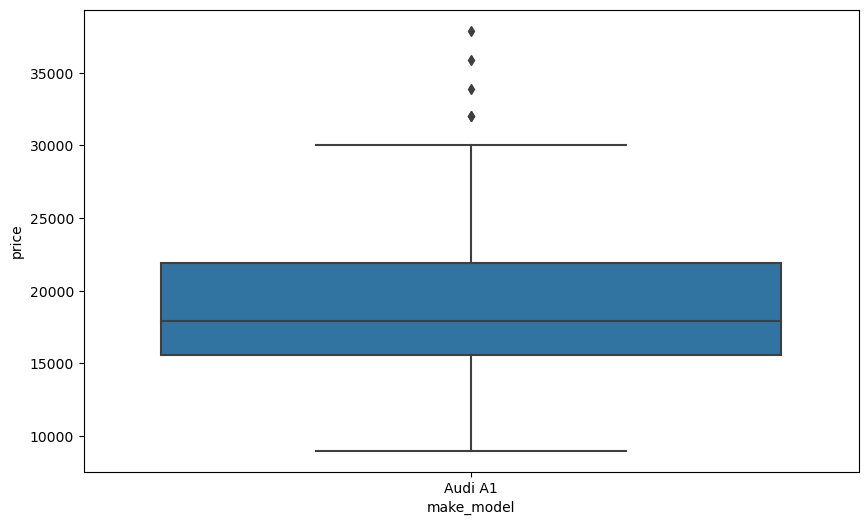

In [22]:
sns.boxplot(x="make_model", y="price", data=df[df["make_model"]== "Audi A1"], whis=1.5)
plt.show()

In [23]:
df[df["make_model"]== "Audi A1"]["price"]

# Audi A1'lerin fiyatları. Bu kodu kullanarak her bir araba için outlier değerleri tespit etmeye çalışacağız.

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [24]:
# 1.5 wisker değerine göre her bir gruba ait outlier olabileceğini değerlendirdiğimiz gözlemleri tespit ediyoruz.

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


## Get dummies 

**get_dummies()** yöntemi, kategorik sütunları ikili kodlama yaparak yeni sütunlara dönüştürür.

Her bir kategori, bir özellik olarak kodlanır ve özellik varsa 1, yoksa 0 olarak kodlanır.

In [ ]:
df.shape

In [25]:
# Bu kod, sütunlarımızdaki her bir hücrede yer alan virgülle ayrılmış metinleri ayrıştırarak,
# bu metinlerin her bir öğesinin ayrı bir sütun olarak temsil edildiği yeni bir veri çerçevesi oluşturur.

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [26]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [27]:
df = pd.get_dummies(df, drop_first =True)

# drop_first=True parametresi, her bir özelliğin ilk kategorisine ait sütunu kaldırır. 
# Bu, overfitting ve multicollinarity önlemek için yapılır.

# Örneğin, "Fuel_Type" sütununda "Diesel", "Gasoline" ve "LPG" gibi üç kategori varsa, sütunlardan sadece ikisi
# (örneğin "Gasoline" ve "LPG") kodlanır ve "Diesel" kategorisi için referans olarak kullanılır.
# Bu sayede, "Gasoline" sütunu ve "LPG" sütunu, "Diesel" sütunu ile ilişkilendirilir ve herhangi bir çoklu doğrusal
# bağımsızlık sorununun önlenmesi sağlanır.

In [28]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [29]:
df.shape

(15914, 133)

In [30]:
df.isnull().any().any()

False

In [31]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

# datamızdaki tüm featurların target ile olan corr.larına bakıyoruz
# targetımız olan price ile corr.larını küçükten büyüğe sıralıyoruz. 
# Targetın kendisiyle olan corr.unu görmek istemediğimizden slicelama ([:-1]) yapıp -1 ile targetı ignore ediyoruz.

age                                        -0.473478
Gearing_Type_Manual                        -0.431798
km                                         -0.399301
make_model_Opel Corsa                      -0.379363
Type_Used                                  -0.366300
make_model_Renault Clio                    -0.297910
Drive_chain_front                          -0.155738
Previous_Owners                            -0.144625
make_model_Opel Astra                      -0.128429
em_CD player                               -0.092823
em_On-board computer                       -0.077462
ss_Central door lock with remote control   -0.070339
ss_Fog lights                              -0.053086
Paint_Type_Perl effect                     -0.049887
ss_Isofix                                  -0.045762
body_type_Sedans                           -0.044251
ss_Central door lock                       -0.043515
ss_Power steering                          -0.041182
Paint_Type_Uni/basic                       -0.

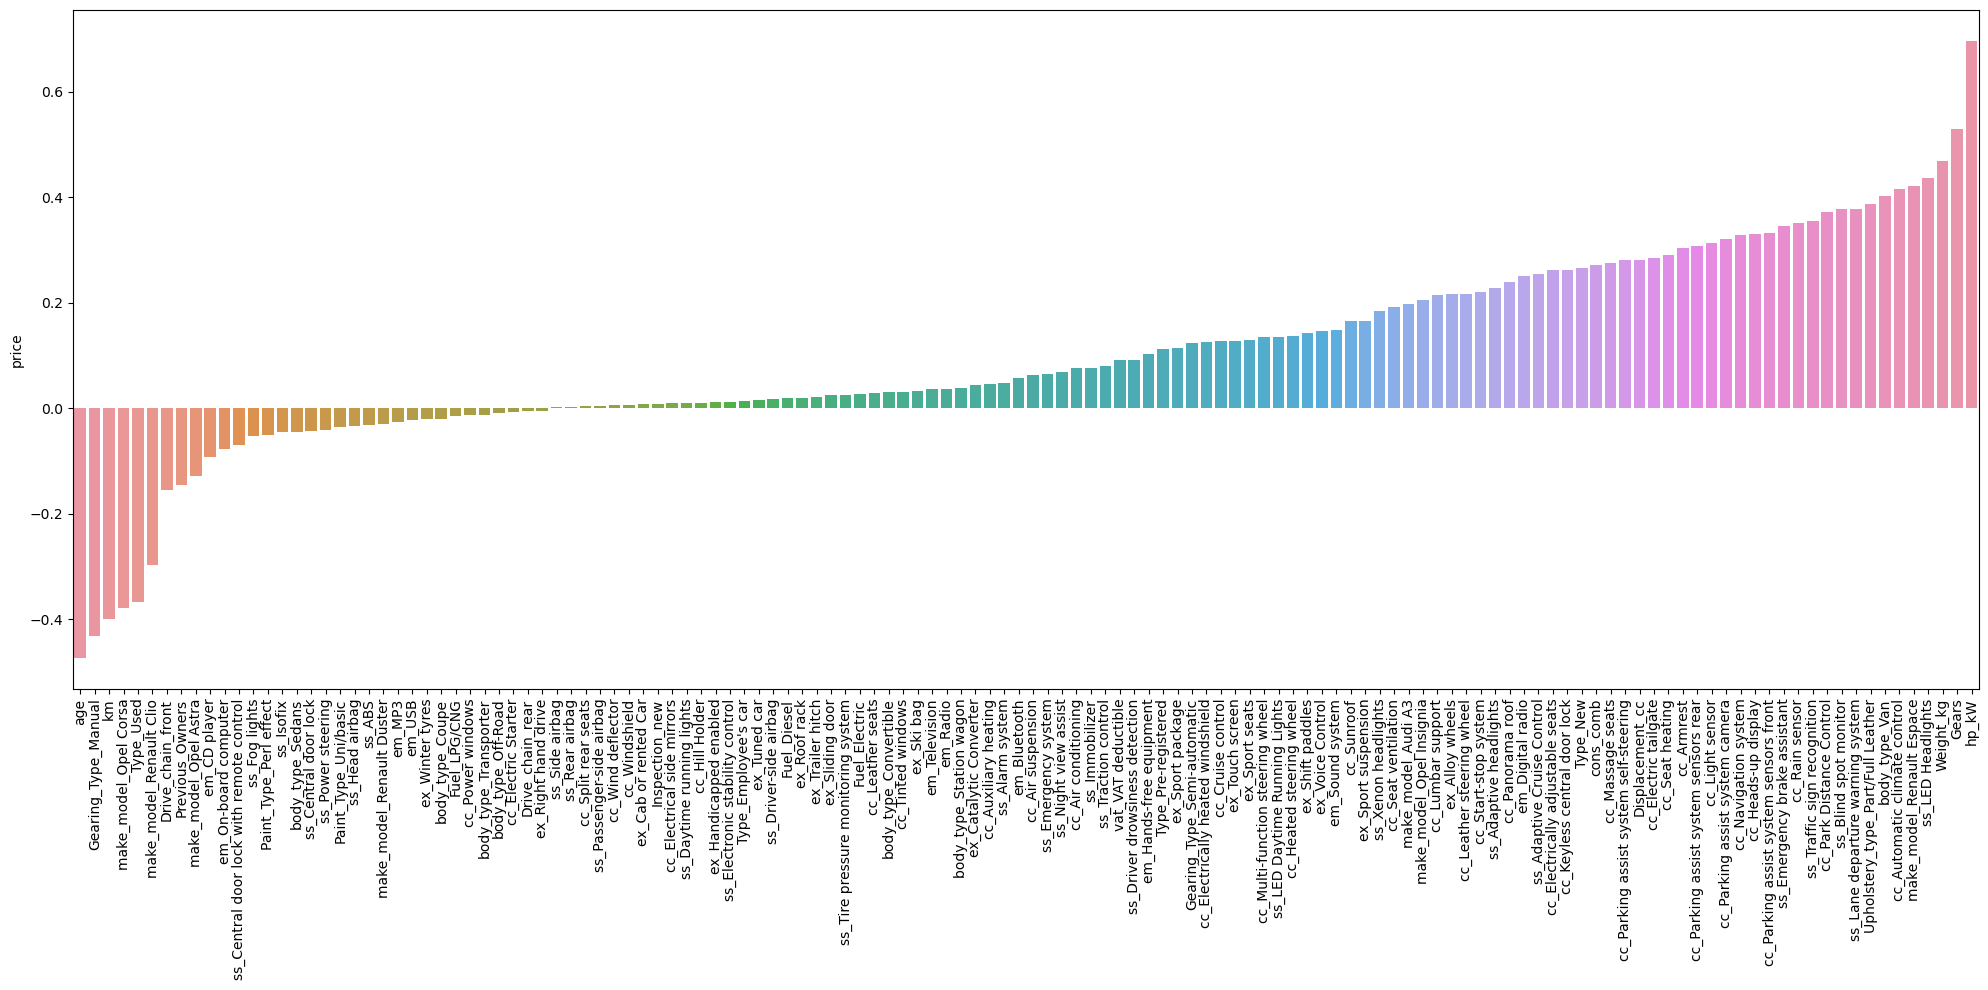

In [32]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# featureler ile target arasındaki corr.ları görselleştiriyoruz.

# Train | Test Split

**random_state=42**

**test size = 0.2**

Bildiğiniz gibi, veri kümesi modelin uygulanmasına geçmeden önce düzenlenmelidir. Modeli fit etme işlemine geçmeden önceki son adımda, veri kümesini eğitim ve test olarak ayırmalısınız. Daha sonra modeli eğitim verisiyle eğitmeli ve modelin performansını test verisinde değerlendirmelisiniz. Oluşturduğunuz eğitim ve test verilerini tüm algoritmalar için kullanabilirsiniz.

Ayrıca tahmin etmeye çalıştığınız hedef değişkeni, yani tahmin etmeye çalıştığınız sütunu da kaldırmalısınız.

Eğittiğiniz regresyon modelinin performansını ölçmek için birçok performans metriği kullanabilirsiniz. Farklı metrik sonuçlarını bir arada görmek için bir fonksiyon tanımlayabilirsiniz.

Tahmin gücünüzü ölçmek için cross validation yöntemini de kullanabilirsiniz. Cross validation, test setinizden farklı veri örnekleri kullanır ve her veri örneği için doğruluk puanını hesaplar. Bu puanları ortalamalarak tahmin gücünüzün  nihai performansını hesaplayabilirsiniz.

In [33]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [34]:
X= df.drop(columns="price")
y= df.price

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitip sonrasında prediction almak için datayı train_test_split fonksiyonu ile train ve test setlerine bölüyoruz.
# Default olarak test_size=0.25'tir.
# Best practice 0.2, 0.25, 0.3 civarı değerler tercih edilir. Burdaki amaç train setine
# olabildiğince fazla veri sağlayabilmek. Özellikle küçük datalarda bu oran 0.1, 0.15 civarında seçilebilir

# random_state ile datayı train ve test e random olarak dağıtıyoruz ve 
# her seferinde train ve teste aynı dataları gönderiyoruz

In [36]:
X_train.shape

(12731, 132)

In [37]:
X_test.shape

(3183, 132)

# Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

**Lineer Regresyon**

Bağımsız değişkenler üzerinden bağımlı değişkeni tahmin eder.

Tek bağımsız değişken varsa simple, birden çok bağımsız değişken varsa multiple lineer regresyon adı verilir.

Simple linear regression'da feature ile target arasında anlamlı bir ilişki varsa bu data linear regression için uygundur

**Lineer regression varsayımları;**

1- Features ile label arasında korelasyon olmalı

2- Verilerin dağılımı normal olmalı

3- Errors’un normal dağılım sergilemesi lazım ve herhangi bir pattern oluşturmaması lazım. Yani line etrafında simetrik dağılmalı.

- Yşapka = b0 + b1X

- Yşapka= tahmin edilen değer

- b0= intercept (doğrunun y eksenini kestiği nokta)

- b1= slope = coefficient = weight

- X=bağımsız değişken

- Residual = Random error = e= Y-Yşapka

**Önemli olan erroru, hatayı minimize etmektir.**

**Best fit line**; hatalarımızı minimize edecek şekilde çiziyor. Tek bir feature olduğunda **Ordinary Least Squares** metot ile, birden fazla olduğunda ise **gradient descent** ile bulunur.

**Cost - loss function**; gerçek değer ile tahmin edilen değerlerlerin farkının karesini alıp ortalama hatayı buluyor.

**Gradient descent** optimizasyon algoritmasıyla, yapacağınız şey, w ve b değerini yavaş yavaş değiştirerek cost - lost fonksiyonunu azaltmak ve minimum değerine getirmeye çalışmak olacak.

İteratif şekilde hatayı minimize etmeye çalışan bir algoritmadır.

**Bias**, bir modelin tahminlerindeki sistematik hatadır. bir modelin tahminleri gerçek değerlerden ne kadar uzaksa, o kadar yüksek bir bias vardır. Yüksek bias, modelin basit olması ve verilerin karmaşıklığını tam olarak yakalayamaması nedeniyle ortaya çıkabilir. Underfitting dolayısıyla

**Variance** ise, modelin farklı veri noktaları üzerindeki tahminlerinin ne kadar değişken olduğunu ifade eder. 
Aynı veri kümesi üzerinde birden çok kez eğitildiğinde farklı sonuçlar elde edilir.
Overfitting sonucunda ortaya çıkar.
Yüksek bir varyans, modelin verilere aşırı uyum sağladığını ve öğrendiği örüntülerin veri seti dışındaki yeni verilere genelleştirilemeyeceğini gösterir.

**bias-varyans trade-off**:
Bias ve variance arasında bir denge kurmak önemlidir. İdeal olarak, bir modelin hem düşük bias hem de düşük variance değerine sahip olması gereklidir. Bu, modelin verilerin karmaşıklığını doğru bir şekilde yakalayabilmesi ve genelleme yapabilmesi anlamına gelir.

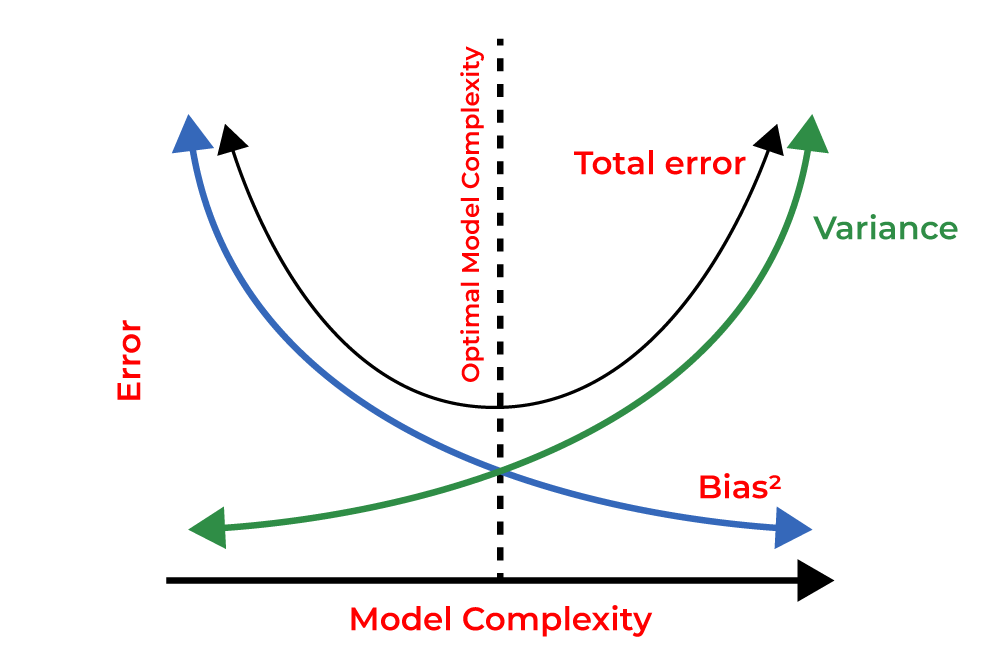

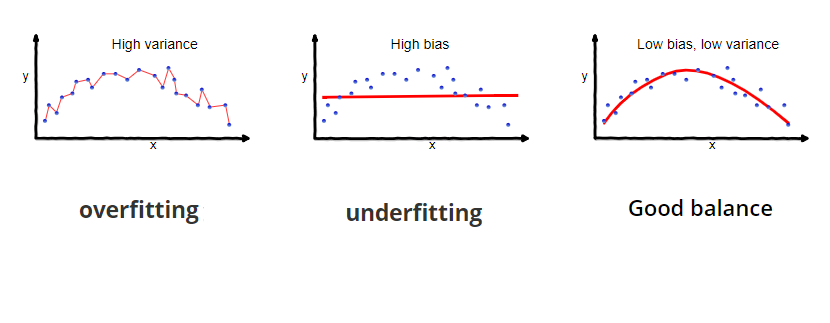

## Model

In [38]:
# train ve test setinin metriclerini karşılaştırabilmek için fonksiyonumuzu tanımlıyoruz.

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [39]:
from sklearn.linear_model import LinearRegression # LinearRegression algortimasını import ediyoruz.

In [40]:
lm = LinearRegression() # object tanimlama

# Algoritmamızı her zaman bir değişkene atıyoruz. Aksi taktirde prediction alırken hata alırız.

In [41]:
lm.fit(X_train,y_train) # veriyi vererek modeli linear regressiona gore egit 

# Burada lm yerine LinearRegression() yazarsak da kod çalışır. Ancak aşağıdaki prediction alırken LinearRegression()
# kullanırsanız hata alırsınız. Bu hatanın önüne geçmek için model =LinearRegression() atamasını mutlaka 
# yapıyoruz.

LinearRegression()

In [42]:
pd.options.display.float_format = '{:.3f}'.format #daha rahat okunabilsin diye

In [43]:
train_val(lm, X_train, y_train, X_test, y_test)

# önce test seti üzerinden metriclerimizi alıyoruz.
# daha sonra train seti üzerinden metriclerimizi de alarak modelin hiç görmediği data üzerinden aldığı scorlar ile eğitim 
# datası üzerinden aldığı scorları karşılaştırıyoruz. Eğer skorlar birbirne yakınsa model genelleyebiliyor demektir.
# Lakin skorlar arasında ciddi farklar varsa model genelleyemiyor demektir.

,train,test
R2,0.891,0.886
mae,1700.029,1728.915
mse,5935067.388,6267140.944
rmse,2436.199,2503.426


## Adjusted R2 Score

**Rkare- Rsquare, R2 (The Coefficient of Determination)** elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını
açıklayabiliyorum veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir.

0-1 arasında değerler alır. 1’e yaklaştıkça başarı oranı artar.

Negatif bir R2 skoru, modelin verileri açıklamak yerine verileri yanıltmakta olduğunu gösterir ve bu modelin kötü performans gösterdiğinin bir göstergesidir. Bu durumda, verilerin farklı bir modelle veya farklı bir veri özellikleri kümesi kullanılarak tekrar modellemesi gerekebilir.

**R-kare** = 1 - (SSR / SST)

**SSR (Residual Sum of Squares) - Reiduallerin Kareleri Toplamı**: 
SSR, gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamıdır. y - yşapka'nın kareler toplamı

Bu ifade, her bir gözlem için gerçek değer ile modelin tahmini arasındaki farkın karesinin toplamını temsil eder.

**SST (Total Sum of Squares) - Toplam Kareler Toplamı**:
SST, gerçek değerlerin ortalamasıyla gerçek değerler arasındaki farkların karelerinin toplamını ifade eder. y - ymean(gerçek değerler ortalaması)

Bu, verilerin genel değişkenliğini gösterir. 

- SSR, modelinizin ne kadar "yanıldığını" ifade eder. Düşük bir SSR değeri, modelinizin gerçek değerlere yakın tahminler yaptığı anlamına gelir.

- SST, verinizin içerdiği toplam değişkenliği gösterir. Bu, modelinizin tahmin etmesi gereken "maksimum değişkenlik" olarak düşünülebilir.

Datamızda çok fazla featura var fakat yeteri kadar gözlem yoksa bu durum modelimizin R2_scorunda yalancı bir iyileştirme yapar. 

Özellikle bu tür datalarda veya datamıza çok fazla yeni feature (dummies feature gibi) ilave olduysa mutlaka 
adjusted R2_score ile gerçek R2_score tespit etmemiz gerekiyor.
 
**Adjusted R2_score** satır ve feature sayısı arasında ki trade off'u kontrol ederek bize bir skore döndürür. Eğer sayılar 
arasında büyük bir dengesizlik varsa adjusted_R2_scorunda ciddi düşüşler olacaktır. 

In [44]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (özelliklerin) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Düzeltilmiş R2 formülünü kullanarak değeri hesaplar
    return adj_r2

In [45]:
y_pred = lm.predict(X_test)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [46]:
adj_r2(y_test, y_pred, df)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.8846640715800353

## Cross Validate

In [47]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

- Overfiting kontrolünü cross validaition üzerinden aldığımız train ve validation scorlarını karşılaştırarak yapıyoruz.

- Her Cross Validation öncesi modeli mutlaka sıfırlıyoruz. Aksi taktirde dataleakage tehlikesi vardır.

- Overfiting kontrolü train seti içerisinde yapılacaktır. train seti içerisinden elde edeceğimiz validation ve train setlerinin ortalamaları alınarak bulunan scorelar karşılaştırılarak overfiting olup olmadığı tespit edilir.

- return_train_score=True; CV'in her iterasyonundaki train scorlarını da alabilmek için return_train_score=True olarak seçilir.

**mae, mse, rmse metriclerinin başında neg ibaresinin bulunma sebebi:**

sklearn algoritmaları scorları maximize etmek üzere dizayn edilmiştir. Ancak mae, mse, rmse metricleri minimize olması 
gereken metricler olduğundan sklearn bu metricleri negatif eksene kaydırırarak maximize etmeye çalışır.

cross_validate, cross_val_score iki fonksiyon da CV işlemi için kullanılabilir. Ancak cross_val_score tek bir metric için
score döndürürken, cross_validate birden fazla metric için score döndürebilir. Bu sebeple sıklıkla tercih edilir.

In [48]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.163,0.011,0.869,0.893,-1796.920,-1684.021,-7411680.847,-5785085.584,-2722.440,-2405.220
1,0.169,0.009,0.902,0.889,-1693.786,-1703.932,-5444805.727,-5998631.235,-2333.411,-2449.210
2,0.155,0.009,0.881,0.892,-1774.840,-1691.681,-6816392.331,-5848345.621,-2610.822,-2418.335
3,0.161,0.010,0.899,0.890,-1651.155,-1709.194,-5183104.431,-6027224.207,-2276.643,-2455.041
4,0.145,0.010,0.871,0.893,-1762.633,-1695.891,-6547950.549,-5879632.391,-2558.896,-2424.795
5,0.151,0.011,0.885,0.891,-1680.670,-1707.824,-5587261.975,-5983669.271,-2363.739,-2446.154
6,0.154,0.010,0.896,0.890,-1677.273,-1707.885,-4955589.641,-6051837.320,-2226.115,-2460.048
7,0.163,0.012,0.891,0.891,-1759.619,-1688.670,-7073807.262,-5823358.607,-2659.663,-2413.164
8,0.149,0.010,0.892,0.890,-1749.306,-1697.121,-6513244.535,-5883601.080,-2552.106,-2425.614
9,0.150,0.011,0.886,0.891,-1679.341,-1704.871,-5713270.933,-5972209.345,-2390.245,-2443.810


In [49]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                    0.887
train_r2                                   0.891
test_neg_mean_absolute_error           -1722.555
train_neg_mean_absolute_error          -1699.109
test_neg_mean_squared_error         -6124710.823
train_neg_mean_squared_error        -5925359.466
test_neg_root_mean_squared_error       -2469.408
train_neg_root_mean_squared_error      -2434.139
dtype: float64

In [50]:
train_val(lm, X_train, y_train, X_test, y_test)

# train_val fonksiyonundan aldığımız train ve test seti scorları bize datamızda overfiting olup olmadığına dair insight 
# verir. 

# Ancak gerçekten overfiting olup olmadığı CV'dan alınan train ve validaiton scorlarının karşılaştırılması ile yapılır.

# Ayrıca, müşteriye vereceğimiz test scorlarının gerçekten tutarlı scorlar olup olmadığının kontrolünü CV'dan
# aldığımız validaiton scorları ile karşılaştırarak yapıyoruz. Scorlar biribirine yakınsa skorlar tutarlı, değilse scorlar
# tutarsız diyoruz.

,train,test
R2,0.891,0.886
mae,1700.029,1728.915
mse,5935067.388,6267140.944
rmse,2436.199,2503.426


In [51]:
2503/df.price.mean()

# hataya ortalamalardan baktığımız için tahmin etmek istediğimiz değerin ortalamasını alıp 
# hataların ortalamasını (error metriklerin ortalaması) tahmin etmek istediğimiz değerin ortalamasına böleceğiz

# iki ortalama değerin birbirine oranı ne kadar hata yaptğımızı gösterecek
# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre
# modelimiz ortalama %13.9 hata yapıyor.

0.13887238926767506

## Prediction Error

In [52]:
# sklearn.__version__
# pip install scikit-learn==1.2.1 --user

from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

# son zamanlarda ML görselleştirmelerinde sıklıkla tercih edilen bir kütüphane
# residuallerin dağılımına hem train hem de test seti için bakabiliyoruz.

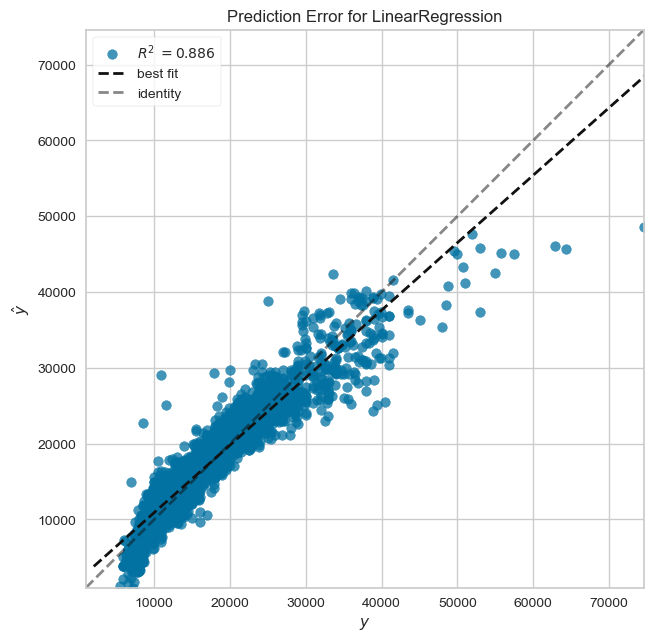

In [53]:
# hatalarımızın nasıl dağıldığına bakacağız
# modelimizi reset edeceğiz
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# prediciton error görseli ile modelimizin yaptığı tahminlerin ne kadar iyi olup olmadığını görebiliyoruz.
# train datası ile eğitiyoruz
# test datası ile skorlarını alıyoruz - grafikleri çizdiriyoruz

# y ekseninde predictionlarımız, x ekseninde ise gerçek değerlerimiz yer alıyor.
# silik (gri) olan identity line modelin tahminlerinin mükemmel olduğu noktaları,
# koyu renkli olan çizgi ise modelimizin eğitim sonrası çizdiği best fit line temsil ediyor.
# koyu olan çizgi ile silik olan çizgi ne kadar birbirine yakın olursa modelin tahminleri o kadar iyi demektir.
# identity line da y değerleri ile tahmin edilen y değerleri farkının ortalaması sıfıra eşittir
# Bu da residualların 0 olması anlamına ve R2 değerinin de 1 olması anlamına gelir.

# Görsele baktığımızda 40 bin EURO ve üzerindeki fiyatlı arabaların best fit linemızı aşağıya doğru çektiğini görebiliyoruz
# Eğer ben datadan scorlarımı bozduğunu gördüğüm 40 bin EURO ve üzerindeki arabaları veya modeller bazında tespit ettiğim
# outlier fiyatlı arabaları datamdan çıkarıp bu data üzerinden yeniden modeli eğitirsem daha iyi scorlar alabilirim miyim

## Residual Plot

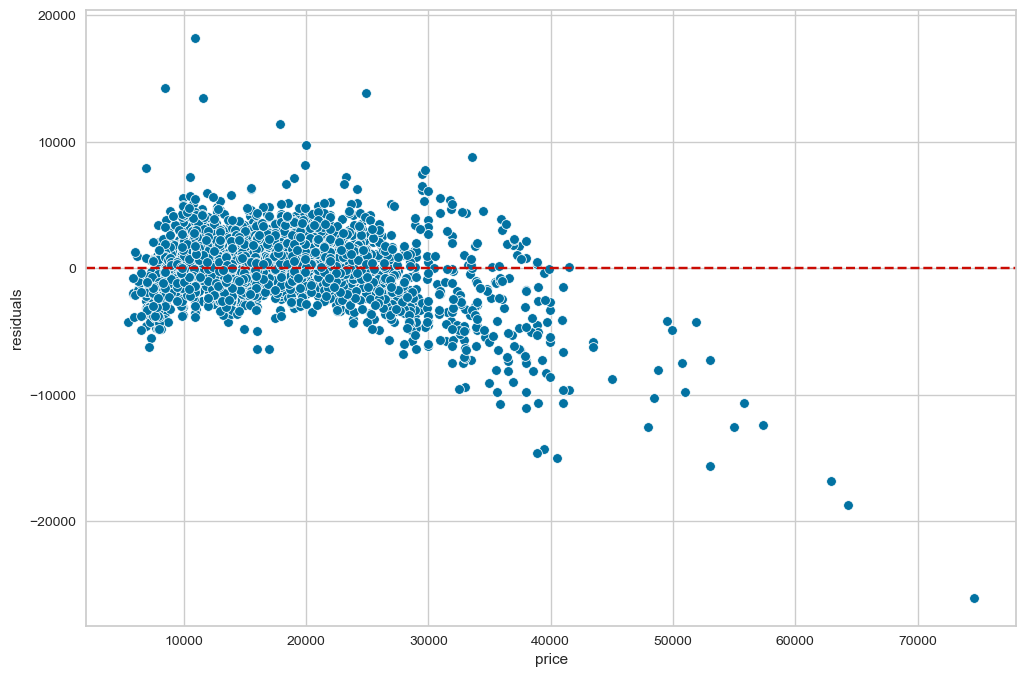

In [54]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# hata terimleri negatif değerler olarak hesaplandığında, grafiğin y-eksenindeki değerler pozitif hale getirilir.
# Bu, hata terimlerinin büyüklükleri arasındaki farkları daha net bir şekilde gösterir.

# residualler;
# 1- hatanın 0 olduğu eksenin her iki tarafına da yaklaşık olarak hem eşit hem de random  olarak dağılacak
# ayrıca pattern içermemeli
# 2- Bu dağılım normal dağılıma uygun olacak

# eğer bu şartlar sağlanıyorsa data linear reg. için uygun bir datadır diyebiliriz.

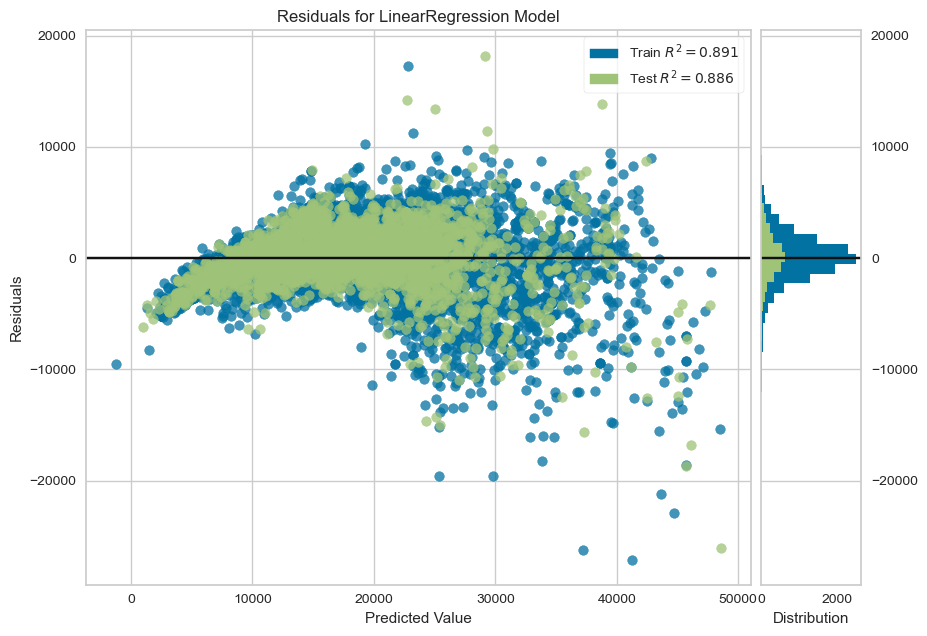

In [55]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

## Dropping observations from the dataset that worsen my predictions

In [56]:
df3 = df[~(df.price>35000)]
df3.head()

# fiyatı 35.000'den büyük olmayan satırları (gözlemleri) filtrelemek için
# Tilde (~) operatörü, mantıksal bir değerin tersini almak için kullanılır. 

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [57]:
len(df[df.price>35000])

495

In [58]:
df2[df2.price>35000].groupby("make_model").count().iloc[:,0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [59]:
df2.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [60]:
X = df3.drop(columns = "price")
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

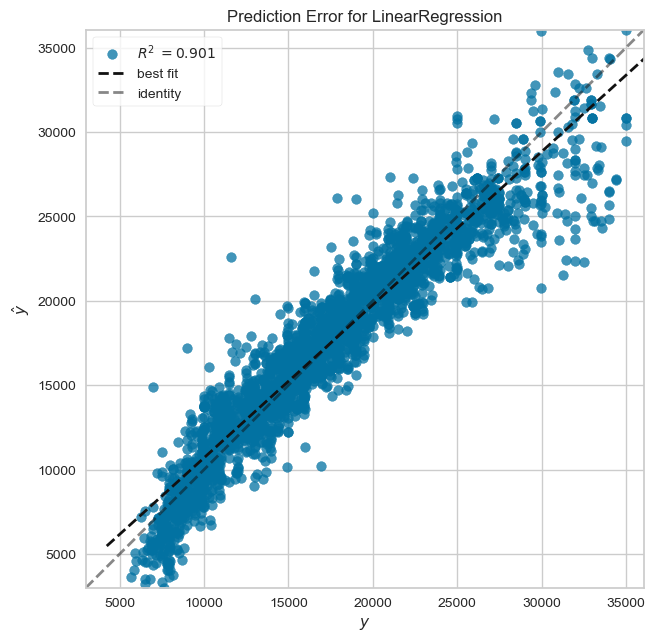

In [62]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [63]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.900,0.901
mae,1418.635,1400.504
mse,3794922.864,3664591.900
rmse,1948.056,1914.312


In [64]:
1914/df3.price.mean()

0.11071120929777156

In [65]:
2503/df2.price.mean()

0.13886746278386217

In [66]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [67]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [68]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
1256,15900,15655.963,244.037
1596,22900,20465.342,2434.658
15393,22900,26592.213,-3692.213
10753,11675,16958.129,-5283.129
1613,22440,21129.851,1310.149
1432,15980,15648.766,331.234
10778,12900,15256.451,-2356.451
6255,8680,7725.049,954.951
6153,10300,10141.149,158.851
13753,5900,5066.290,833.710


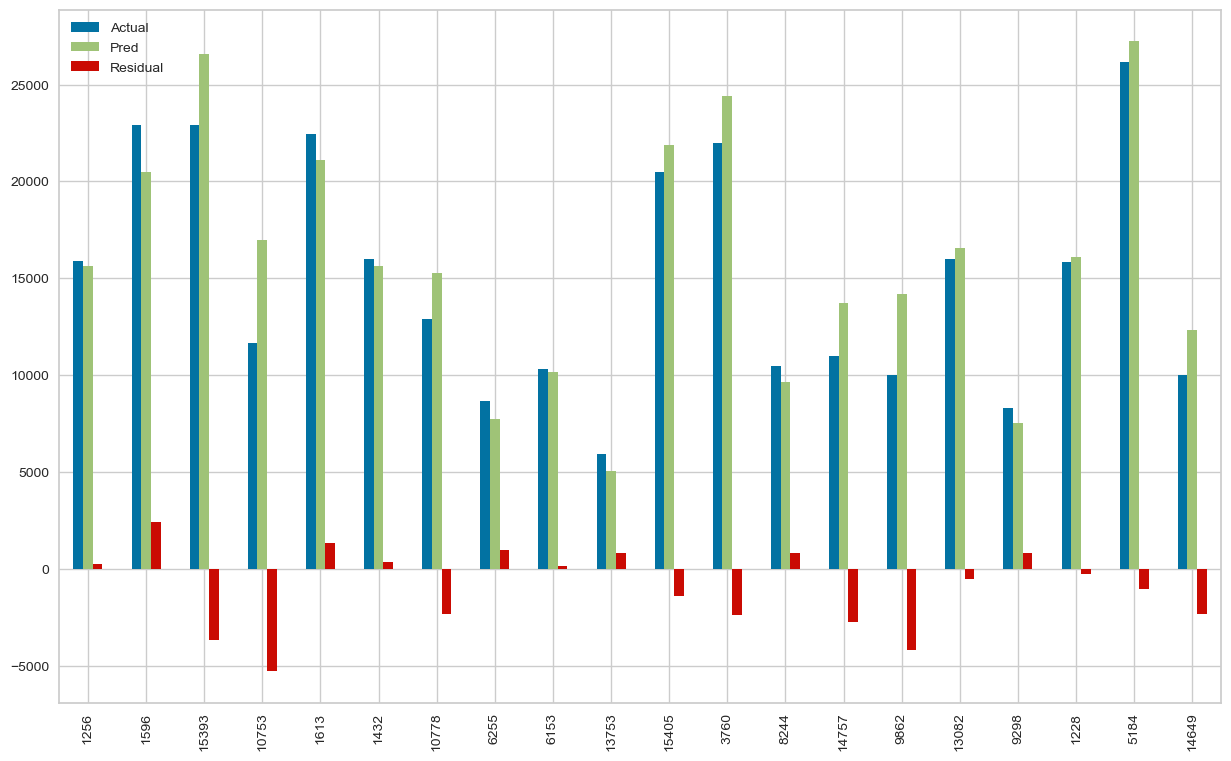

In [69]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [70]:
# katsıyları featurların tahmin üzerindeki etkisini görmek ve feature selection için kullanacağız.
# katsayıların sıralaması modele eğitim için verdiğimiz X_train datasının feature sıralamasıyla aynıdır.

pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9921.954
make_model_Renault Clio,-5500.114
make_model_Opel Corsa,-5459.926
make_model_Opel Astra,-3565.699
Type_Employee's car,-2093.149
Type_Used,-2001.788
Gearing_Type_Manual,-1541.037
age,-1462.784
Drive_chain_front,-1410.763
Drive_chain_rear,-1396.557


- Pozitif bir katsayı, ilgili girdi özelliği arttıkça hedef değişkeninin de artacağını gösterir.

- Negatif bir katsayı, ilgili girdi özelliği arttıkça hedef değişkeninin azalacağını gösterir.

- Katsayının mutlak değeri ne kadar büyükse, ilgili girdi özelliğinin hedef değişken üzerindeki etkisi o kadar büyük demektir.

- Katsayı sıfıra yakınsa, ilgili girdi özelliğinin hedef değişken üzerindeki etkisi zayıf veya yoktur demektir.

## Pipeline

**Pipeline Nedir?**

**Pipeline**, veri dönüştürme adımlarını ve bir tahminciyi (estimator) bir araya getirerek, tüm süreci tek bir adımda çalıştırmamıza olanak tanır. Bu, hem kodu temiz tutar hem de  data leakage (veri sızıntısı) riskini azaltır.

**Pipeline'ın Amaçları:**

1. **Daha Temiz Kod**: Çeşitli dönüştürme adımları ve tahmincileri bir araya getirerek, kodunuzu daha düzenli ve anlaşılır hale getirir.
 
2. **Veri Sızıntısını Önleme**: Özellikle veri ön işleme ve model eğitimi sırasında, yanlış sıra veya kavramsal hatalar veri sızıntısına neden olabilir. `Pipeline`, bu tür sızıntıları önler çünkü her adımı doğru sırada çalıştırır.

3. **Kolay Doğrulama ve Parametre Ayarlama**: Pipeline'ı Cross Validation ve GridSearchCV gibi araçlarla birleştirerek, hem veri dönüşüm parametrelerini hem de model hiperparametrelerini aynı anda ayarlayabilirsiniz.

**Adımlar:**

- Operations Tanımlama
 
- Pipeline Oluşturma
  
- Pipeline'ı Eğitme

In [158]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

# Burada, veriyi ölçeklendirmek için `MinMaxScaler` ve modellemek için `LinearRegression` adımlarını tanımlıyoruz.
# Her adım, (ad, dönüştürücü/tahminci) şeklinde bir çifttir.

In [72]:
pipe_model = Pipeline(steps=operations)

#Tanımladığımız adımlarla bir pipeline oluşturuyoruz.

In [73]:
pipe_model.fit(X_train, y_train)

#fit metodunu kullanarak, veri dönüştürme adımlarını ve modeli eğitiyoruz. 
# Bu, önce verimizi MinMaxScaler ile ölçeklendirir ve ardından ölçeklendirilmiş veri üzerinde 
#LinearRegression modelini eğitir.

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [74]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.900,0.901
mae,1418.635,1400.504
mse,3794922.864,3664591.900
rmse,1948.056,1914.312


### Cross Validation

In [159]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [160]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Elde edilen cross validation (çapraz doğrulama) sonuçları bir pandas DataFrame'e dönüştürülüyor ve 
# her bir kat (fold) için sonuçlar görüntüleniyor.
# scores.iloc[:,2:].mean() ifadesi ile sadece modelin performans metriklerinin ortalamalarını alıyoruz (ilk iki 
# sütun olan "fit_time" ve "score_time" sütunları hariç).

test_r2                                    0.867
train_r2                                   0.867
test_neg_mean_absolute_error           -1614.354
train_neg_mean_absolute_error          -1612.342
test_neg_mean_squared_error         -5020652.581
train_neg_mean_squared_error        -5006641.345
test_neg_root_mean_squared_error       -2239.248
train_neg_root_mean_squared_error      -2237.535
dtype: float64

# Implement Ridge Regression

**Neden ve Ne Zaman Ridge-Lasso Kullanırım**
                                          
Ridge ve Lasso regresyonları, doğrusal regresyonun regularizasyon versiyonlarıdır. Bu regularizasyon, modelin overfitting e karşı daha dayanıklı olmasını sağlar ve bazen modelin genel performansını artırabilir. 

1. **Overfitting i Önleme**:
   - **Ridge (L2 Regülarizasyon)**: Modelin katsayılarını küçültmek için katsayıların karelerinin toplamını ceza olarak ekler. Bu, modelin karmaşıklığını azaltarak overfitting i önler.
   - **Lasso (L1 Regülarizasyon)**: Modelin katsayılarını sıfıra doğru sıkıştırmak için katsayıların mutlak değerlerinin toplamını ceza olarak ekler. Bu, bazı katsayıları tamamen sıfıra getirerek özellik seçimi yapar ve modelin karmaşıklığını azaltır.

2. **Feature Selection**:
   - Lasso regresyonu, bazı katsayıları tamamen sıfıra indirerek etkisiz feature ları modelden çıkarabilir. Bu, feature selection olarak da adlandırılır ve yüksek boyutlu veri setlerinde çok faydalıdır.

3. **Multicollinarity**:
   - Eğer bir veri setindeki özellikler arasında yüksek korelasyon (multicollinarity) varsa, bu, linear regresyonun katsayılarını istikrarsızlaştırabilir. Ridge ve Lasso, bu tür durumlarda katsayıları stabilize edebilir.

4. **Model Yorumlanabilirliği**:
   - Lasso, yalnızca en önemli feature ları modele dahil ederek modelin yorumlanabilirliğini artırabilir. Ridge de katsayıları küçülterek, modeldeki feature ların etkisini daha anlaşılır kılar.

Sonuç olarak, Ridge ve Lasso regresyonları, linear regresyonun bazı kısıtlamalarını aşmamıza ve daha genelleştirilebilir, daha istikrarlı modeller oluşturmamıza yardımcı olabilir. Hangi yöntemin kullanılacağı, veri setine, problem tanımına ve özellikle modelin ne kadar esnek olmasını istediğinize bağlıdır. Bu iki Regülarizasyon tekniği arasında bir denge bulmak için **Elastic Net** gibi yaklaşımlar da mevcuttur.

**L2 Regularization (Ridge Regularization):**

- L2 regularization, model ağırlıklarının düşük olmasını hedefler, böylece modelin güçlülüğü sınırlandırılır. 

- Katsayıları sıfıra doğru daraltır, ancak hiçbir katsayıyı tam olarak sıfıra ayarlamaz. Tüm featureların kalmasını istediğimiz durumlarda kullanılır.

- Residuallerin toplamına lambda (regularization parameter) x katsayıların karelerinin toplamı kadar hata eklenir.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [77]:
# ridge reg.algortimasında eğitim yapacağımız data mutlaka scale edilmiş olmalıdır.Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hem de featureları önemli önemsiz olarak 
# gruplandırabiliyor

# niçin MinMax scaling kullanıyoruz?? 
#get_dumies ile 0-1 arasına sığdırdığımız featurelarımız olduğu için

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Hedef değişkeninin ölçeklendirilmesi doğrusal regresyon için gerekli değildir, çünkü hedef değişkeni katsayıların
hesaplanmasında kullanılmaz.**

## Model

In [78]:
from sklearn.linear_model import Ridge

In [79]:
ridge_model = Ridge(alpha=1, random_state=42) #default alpha=1 alpha=regülarizasyon kuvveti

# alpha reg. hyper parametresidir. Bu deger büyüdükçe uygulanan reg. kuvveti artar. overfitingi yenmek için 
# bu hyper parameter artırılmalıdır.

In [80]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [81]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1418.789,1399.763
mse,3796678.095,3662786.099
rmse,1948.507,1913.841


## Finding best alpha for Ridge

In [82]:
from sklearn.model_selection import GridSearchCV

GridSearchCV algortimasını ML modelimiz için en iyi metric sonuçlarını döndürecek hyper paremetreyi bulmak için kullanılır. Birden fazla hyperparametremiz olsaydı en iyi sonucu dönderen hyperparametre kombinasyonlarını bulacaktı.

**hyperparametre** ; modelimizi ayarlarken kullandığımız ince parametreler

**parametre** =modelin bulduğu

**hyper** = bizim ayarladığımız ,düzenlediğimiz değerler

GridSearchCV önce en iyi parametreleri bulur. Sonra bulduğu parametreler ile modeli eğitir. 
Bu nedenle son halinde en iyi parametreler vardır.

In [83]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

# GridsearchCV(GS) algortiması öncelikle ilgili hyperparametre (HP) için bir uzay aralığı ister. Bunun için GS'e 
# vereceğimiz uzay aralığını belirliyoruz. (0.01 ile 100 arasında eşit aralıklarla bölünmüş 100 farklı değer veriyoruz)

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [84]:
ridge_model = Ridge(random_state=42) 

# GridsearchCV ayrıca kulllanacağımız ML algortimasını ister.

In [85]:
param_grid = {"alpha":alpha_space}

# hyperparameter uzaylarını bir dictionary içerisine ML algortimasında geçen hyperparameter (HP) isimleriyle yazıyoruz.
# HP karşısına bir list veya array olarak uzayı tanımlıyoruz. 
# Burda alpha karşısına tanımladığımız alpha_space değişkeninin 100 öğeli bir array olduğuna dikkat edin.

In [86]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

# ridge ML modelinin scorlarının hangi metrice göre scorlarının iyileştirilmesini istiyorsak scoring karşısına ilgili 
# metricimizi yazıyoruz. Tek bir metrik yazabiliriz. Default degeri R2_scorudur.

# GridsearcCV istediğimiz metrici maximize edecek şekilde hyperparameter uzayındaki tüm değerler için ayrı ayrı 
# datanın farklı bölgelerinden scorlar alır (cv'de belirttiğimiz sayıya göre) ve bunların ortalamasını hesaplar. 
# Ortalaması en yüksek olan hyperparameter değer/değerlerini döndürür.

# default cv sayısı 5'dir.

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [87]:
ridge_grid_model.fit(X_train_scaled,y_train) 

# cv =10 verdiğimizden her alpha değeri için datanın 10 farklı bölgesinde eğitimler yapıyor

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [88]:
ridge_grid_model.best_params_

# yaptığı eğitim sonrasında en iyi değer olarak 1.02 bulmuş.

{'alpha': 1.02}

In [89]:
ridge_grid_model.best_estimator_

# hyper parametrelerden default haricinde bulunan değerleri döndürür sadece, eğer gridsearch sonrası en iyi alpha değermiz
# 1 olsaydı  burda 1 değerini göstermeyecekti.

# arr = np.linspace(0.01, 100, 100)
# print(1.02 in arr)

Ridge(alpha=1.02, random_state=42)

In [90]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136,0.047,0.002,0.001,0.010,{'alpha': 0.01},-1980.637,-1983.578,-2063.026,-1938.249,-1953.814,-1932.014,-1988.311,-1978.189,-2034.167,-1928.672,-1978.066,41.523,2
1,0.097,0.015,0.003,0.002,1.020,{'alpha': 1.02},-1981.727,-1978.237,-2062.639,-1938.756,-1948.486,-1935.378,-1992.006,-1976.204,-2035.671,-1927.093,-1977.620,41.858,1
2,0.091,0.014,0.003,0.002,2.030,{'alpha': 2.03},-1983.073,-1975.177,-2062.941,-1939.955,-1945.952,-1938.487,-1995.993,-1976.062,-2037.691,-1926.951,-1978.228,42.167,3
3,0.123,0.048,0.002,0.001,3.040,{'alpha': 3.04},-1984.647,-1973.347,-2063.654,-1941.568,-1944.854,-1941.401,-2000.055,-1976.892,-2039.930,-1927.667,-1979.401,42.432,4
4,0.232,0.151,0.003,0.003,4.050,{'alpha': 4.05},-1986.404,-1972.315,-2064.650,-1943.445,-1944.620,-1944.167,-2004.099,-1978.302,-2042.272,-1928.928,-1980.920,42.660,5
5,0.116,0.018,0.002,0.001,5.060,{'alpha': 5.06},-1988.304,-1971.843,-2065.852,-1945.498,-1944.947,-1946.820,-2008.083,-1980.080,-2044.663,-1930.553,-1982.664,42.860,6
6,0.112,0.017,0.005,0.009,6.070,{'alpha': 6.07},-1990.315,-1971.780,-2067.206,-1947.670,-1945.659,-1949.383,-2011.990,-1982.103,-2047.077,-1932.423,-1984.561,43.039,7
7,0.108,0.012,0.002,0.001,7.080,{'alpha': 7.08},-1992.410,-1972.026,-2068.673,-1949.924,-1946.644,-1951.870,-2015.809,-1984.293,-2049.498,-1934.463,-1986.561,43.201,8
8,0.093,0.008,0.001,0.000,8.090,{'alpha': 8.09},-1994.568,-1972.511,-2070.225,-1952.234,-1947.828,-1954.292,-2019.540,-1986.599,-2051.918,-1936.620,-1988.634,43.349,9
9,0.114,0.012,0.002,0.001,9.100,{'alpha': 9.1},-1996.774,-1973.185,-2071.840,-1954.580,-1949.162,-1956.658,-2023.181,-1988.985,-2054.329,-1938.857,-1990.755,43.486,10


In [91]:
ridge_grid_model.best_index_

# en iyi scorun alındığı df indexini döndürür.

1

In [92]:
ridge_grid_model.best_score_

-1977.619805802377

In [93]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1418.795,1399.757
mse,3796741.194,3662792.595
rmse,1948.523,1913.842


In [94]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [95]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

# 'GridSearchCV' object has no attribute 'coef_'
# grid modellerinin coef_ özelliği olmadığından grdisearch sonrası bulduğumuz en iyi hyperparametere göre manuel olarak 
# modeli yeniden kurup eğitiyoruz ve coef_leri elde ediyoruz.

,Coef
km,-10629.403
make_model_Renault Duster,-8805.406
make_model_Opel Corsa,-5491.997
make_model_Renault Clio,-5477.417
age,-4427.746
make_model_Opel Astra,-3526.997
Displacement_cc,-2440.269
Type_Employee's car,-2076.149
Type_Used,-1993.716
Gearing_Type_Manual,-1558.270


# Implement Lasso Regression

**L1 Regularization (Lasso Regularization):** L1 regularization, model ağırlıklarının bazılarının sıfır olmasını sağlar. 

- Bu yöntem, feature selection yapmak için de kullanılabilir. 

- Katsayıların sıfıra doğru daralmasını sağlar ve bazı katsayıları tam olarak sıfıra ayarlar. Bu şekilde önemsiz featureları düşürür, modeli daha sade hale getirir.

- Residuallerin toplamına lambda (regularization parameter(hiperparametre))(model içerisinde alfa olarak ifade edilmekte) x katsayıların mutlak değerlerinin toplamı kadar hata eklenir. 

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Model

In [96]:
from sklearn.linear_model import Lasso, LassoCV

In [97]:
lasso_model = Lasso(random_state=42, alpha=1)

# Lasso modeli de datanın scale edilmiş halde verilmesini ister. Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hemde feature selection işlemi yapmamızı sağlıyor

In [98]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [99]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.723,1396.817
mse,3808435.223,3647222.237
rmse,1951.521,1909.770


## Finding best alpha for Lasso

In [100]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [101]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [102]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [103]:
lasso_grid_model.best_score_

-1976.8879951928193

In [104]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.779,1396.803
mse,3808860.485,3647145.516
rmse,1951.630,1909.750


In [105]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [106]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10618.221
make_model_Renault Duster,-7682.528
make_model_Opel Corsa,-5466.866
make_model_Renault Clio,-5417.008
age,-4443.859
make_model_Opel Astra,-3514.194
Displacement_cc,-2059.280
Type_Employee's car,-1979.332
Type_Used,-1916.507
Gearing_Type_Manual,-1579.796


# Implement Elastic-Net

Ridge Regresyon ve Lasso tekniklerinin bir kombinasyonudur. 

Regülarizasyon terimlerinin gücünü belirlemek için iki ayrı düzenleme parametresine sahiptir ve bu sayede Ridge Regresyon ve Lasso arasında bir denge bulunabilir. 

Hiperparametre olarak l1_ratio=1 seçildiğinde Lasso gibi l1_ratio=0 seçildiğinde Ridge gibi davranır. Genelde Lasso eğimlidir.

**Elastic-Net'in Kullanılacağı Durumlar:**

Elastic-Net, genellikle birçok özelliğin birbiriyle yüksek korelasyona sahip olduğu ve aynı zamanda bazı özelliklerin tamamen atılmasını istediğinizde yararlıdır. 

Feature selection a ihtiyaç duyarken, aynı zamanda özellikler arasındaki yüksek korelasyonu yönetmek istiyorsanız, Elastic-Net bu tür bir denge kurma ihtiyacını karşılar.

**Elastic-Net'in Avantajları:**

1. **Özellik Seçimi ve Düzenlileştirme**: Elastic-Net, Lasso'nun özellik seçimi kapasitesini ve Ridge'nin model katsayılarına uyguladığı regülarizasyonu bir araya getirir. Bu, hem feature selection yapmak hem de katsayıları düzenlemek istediğinizde kullanışlıdır.

2. **Çoklu Doğrusallık**: Yüksek korelasyonlu özelliklere sahip veri setlerinde, Lasso rastgele bir özelliği seçebilir. Elastic-Net, bu tür özellik gruplarını birlikte seçerek bu sorunu hafifletebilir.

3. **Yüksek Boyutlu Veriler**: Feature sayısının gözlem sayısından daha fazla olduğu durumlarda Elastic-Net, Lasso'nun avantajlarını korurken Ridge'nin stabilitesini de sağlar.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Model

In [107]:
from sklearn.linear_model import ElasticNet

In [108]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [109]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.595,0.597
mae,3082.843,3076.232
mse,15282663.202,14844114.313
rmse,3909.305,3852.806


## Finding best alpha and l1_ratio for ElasticNet

In [110]:
elastic_model = ElasticNet(random_state=42)

In [111]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

**alpha**:
   - Bu parametre, genel regularization şiddetini kontrol eder.
   - alpha = 0 olduğunda, ElasticNet hiçbir düzenleme yapmaz.
   - alpha değeri büyüdükçe, düzenlemenin şiddeti artar. Bu modelin overfittinge karşı daha dirençli olmasına yardımcı olabilir. 

**l1_ratio**:
   - Bu parametre, L1 (Lasso) ve L2 (Ridge) düzenlemesi arasındaki karışımı kontrol eder.
   - l1_ratio = 1 olduğunda, bu tamamen L1 (yani sadece Lasso) anlamına gelir.
   - l1_ratio = 0 olduğunda, bu tamamen L2 (yani sadece Ridge) anlamına gelir.
   - 0 < l1_ratio < 1 olduğunda, hem L1 hem de L2 düzenlemelerinin bir kombinasyonunu elde edersiniz. 
   - Örneğin, l1_ratio = 0.5 ise L1 ve L2 düzenlemelerinin eşit ölçüde kullanıldığı anlamına gelir.

In [112]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [113]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [163]:
elastic_grid_model.best_score_ #rmse

-1976.8879951928193

In [115]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.779,1396.803
mse,3808860.485,3647145.516
rmse,1951.630,1909.750


In [116]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importance

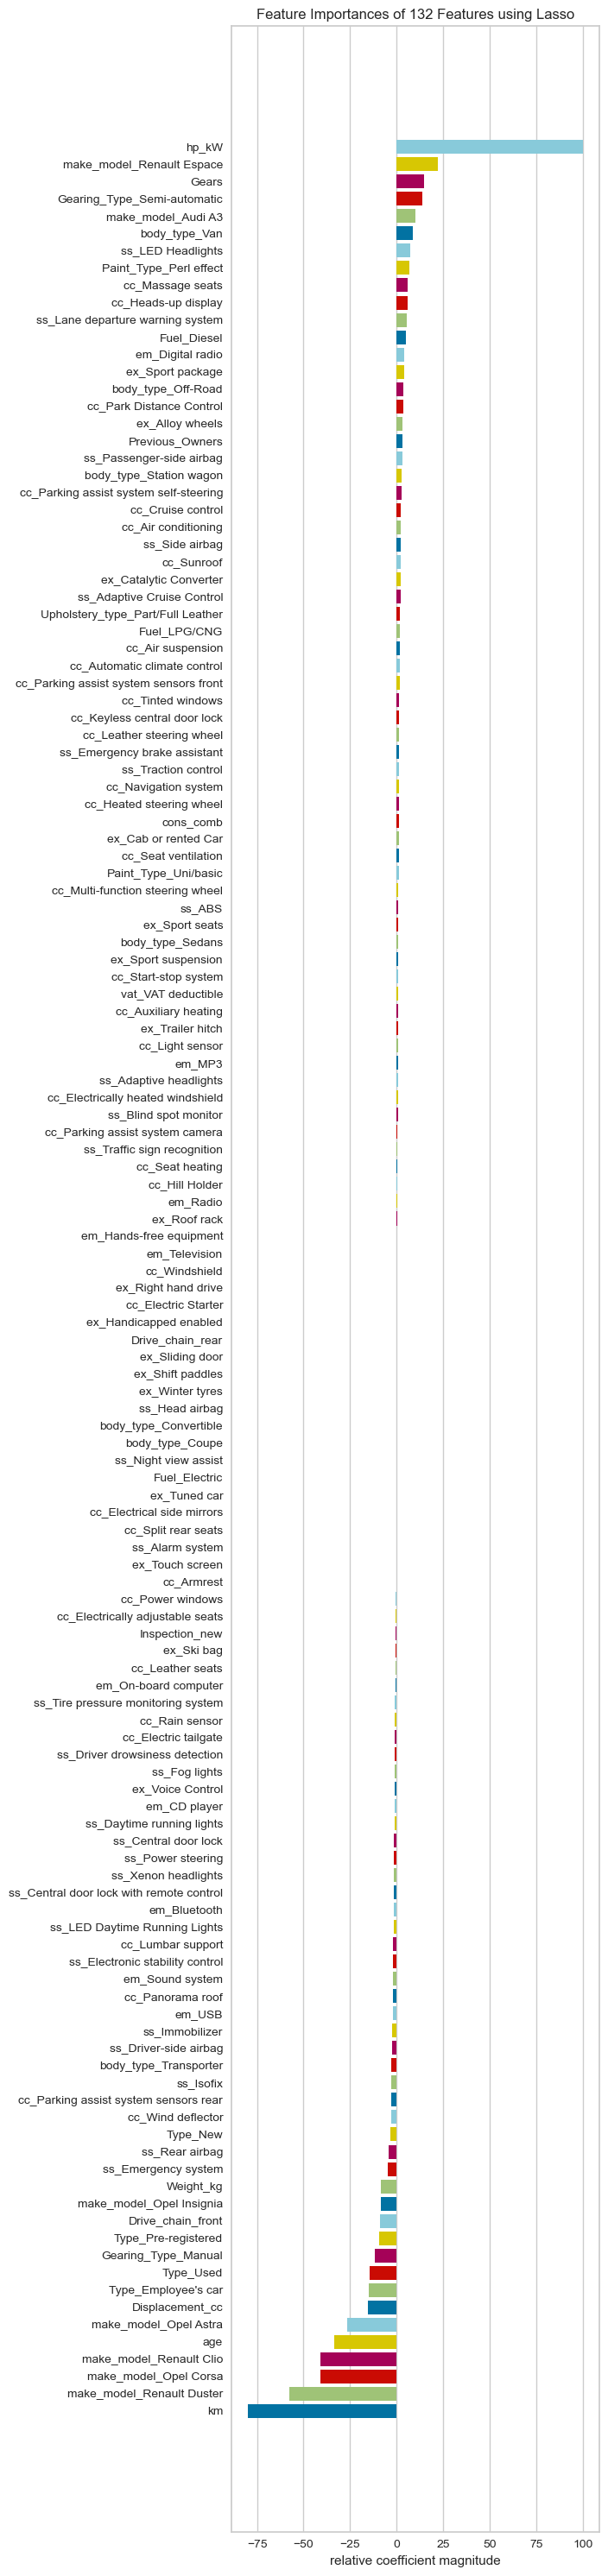

In [117]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [118]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "price"]]

# tahminlemeye en fazla etkisi olan 5 feature'ı seçiyoruz.
# Burda make_model feature neden seçildi şeklinde aklınıza bir soru gelebilir. Yukardaki görsel incelendiğinde
# tahminlemeye en fazla etkisi olan featurlar arasında make_model featurenın unique kategorik 
# gözlemlerinin (Audi A3, AudiA1, Renault Espace vb) olduğunu gördüğümüzden make_model featuranı da seçtik.

In [119]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [120]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [121]:
df_new.drop(index=[2614], inplace =True)

In [122]:
df_new = df_new[~(df_new.price>35000)]

In [123]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0


In [124]:
len(df_new)

15419

In [125]:
# yeni 6 featurlı data setimize göre X ve y mizi belirleyip modeli yeniden kuruyoruz. 

X = df_new.drop(columns = ["price"])
y= df_new.price

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [129]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [130]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [131]:
lasso_final_model.best_score_

-2239.588352950935

In [132]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [133]:
2132/df_new.price.mean()

0.1233209499596912

In [165]:
y_pred = lasso_final_model.predict(X_test_scaled) #Bu code blogu asagida 11.section da kulaniliyor.
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [135]:
# tüm modellerden elde ettiğimiz metricleri scores değişkenine atıyoruz. Daha sonra model isimlerinin
# indexte, metriclerin featurlarda görünmesi maksadıyla df'in transposunu alıyoruz.

scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.901,1400.504,1914.312
ridge_m,0.901,1399.757,1913.842
lasso_m,0.901,1396.803,1909.750
elastic_m,0.901,1396.803,1909.750
final_m,0.877,1553.998,2132.539


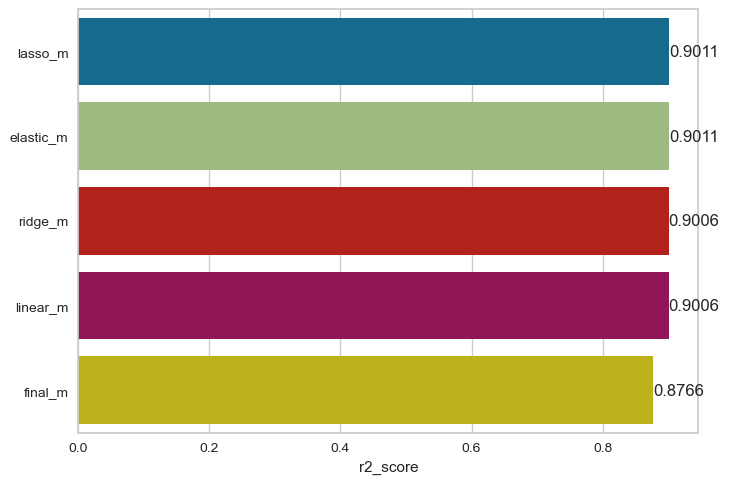

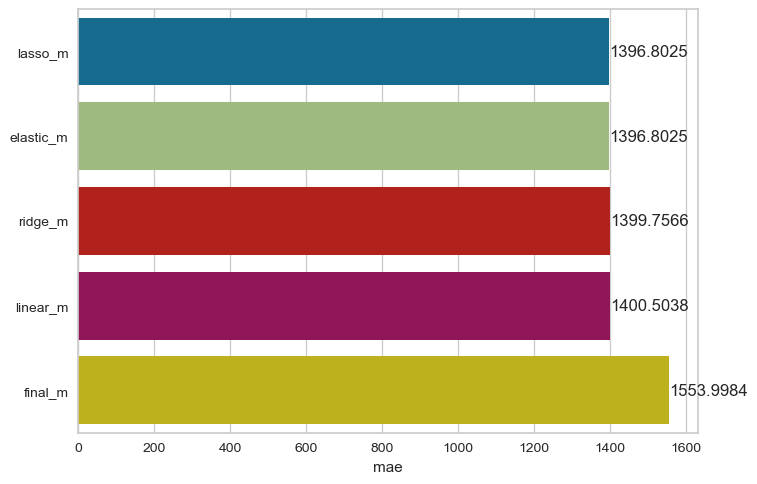

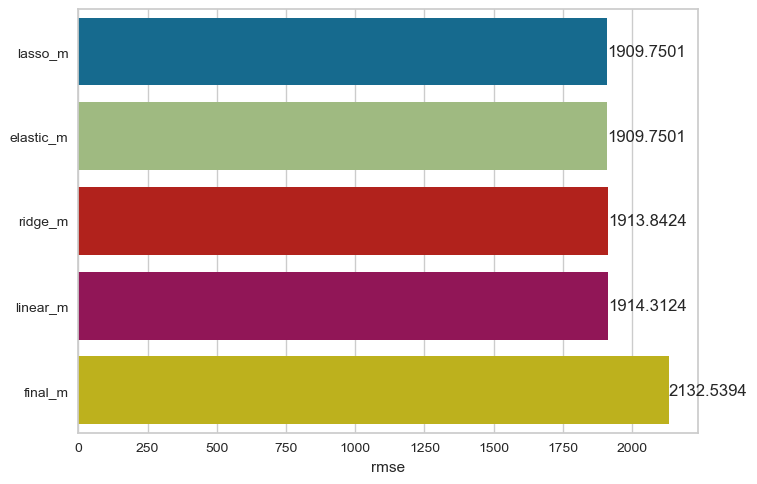

In [136]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # eğer metricimiz r2_score ise barplot büyükten küçüğe sıralanacak
    else:
        ascending = True # eğer metricimiz mae veya rmse ise barplot küçükten büyüğe sıralanacak
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

# Prediction

## Prediction with new observation

In [137]:
# Son aşamada train ve test seti şeklinde ayırım yapmadığımızı unutmayın

final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [138]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [139]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [140]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [141]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [142]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [143]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,1,1


In [144]:
X.head(1)
# predict ettireceğimiz gözlemin feature sıralaması eğitim verdiğimiz datanın feature sıralaması aynı olmalı.

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,1,0,0


In [145]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,1,0,0,0,0,0,0,1,0,0


In [164]:
my_dict = final_scaler.transform(my_dict) # scaling
my_dict

array([[-2.00348476e-01,  1.69172745e-07,  2.22222222e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [147]:
final_model.predict(my_dict)

array([19559.29001107])

## Prediction with random samples

In [148]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [149]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [150]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [151]:
final_model.best_estimator_

Lasso(alpha=0.01)

**Lasso(alpha=0.01) ?**

**alpha**, Lasso regresyonunun regularization şiddetini kontrol eder. Regularization, modelin overfitting eğilimini azaltmak için kullanılır. 

- Eğer alpha değeri 0'a yakın bir değerse (örneğin 0.01), Lasso regülarizasyonu azalır ve model linear regresyona benzer.
- Eğer alpha değeri büyükse, Lasso regülarizasyonu artar ve daha fazla feature katsayısı sıfıra eşitlenir, bu da modelin daha basit hale gelmesine neden olur.

Özetle, modelin overfitting e karşı bir miktar koruma sağladığı, ancak yine de modelin çoğu feature ı kullanmasına izin verdiği anlamına gelir.

In [166]:
random_samples = df_new.sample(n=20) #Disaridan veri girisi olacak ise buradan excel'i okutmaliyiz.

In [153]:
X_random = random_samples.drop(columns=["price"])

In [154]:
X_random = final_scaler.transform(X_random)

In [155]:
predictions = final_model.predict(X_random)
predictions

array([24407.39193485, 19660.99574814,  3984.29976999, 18042.4918104 ,
       16245.0868533 ,  8385.92960659,  9149.85453968, 28102.06632758,
       18325.52552324, 20672.59935219, 12480.24434617, 12440.3806762 ,
       18073.33032014, 14349.47260827, 23043.49525495, 17987.81092957,
       15965.55143862, 13385.27128421, 18643.26776193, 17606.87111533])

In [156]:
true_labels = random_samples["price"].values
true_labels

array([25195, 18400,  7180, 16950, 15850,  8990,  9900, 32313, 17490,
       22450, 11390, 11990, 18890, 10800, 21980, 14500, 15490, 14499,
       17980, 15499], dtype=int64)

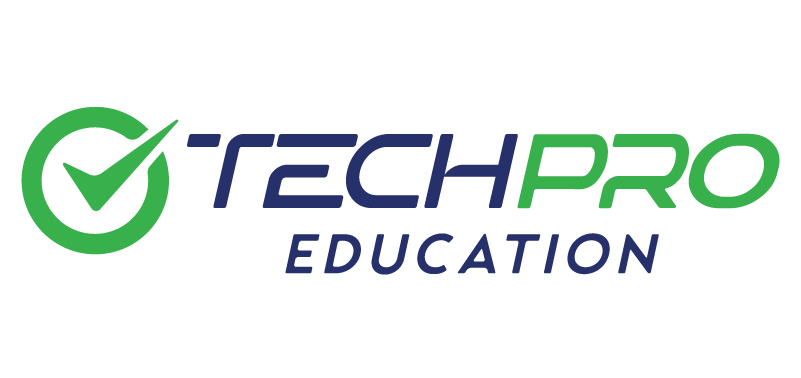